<a href="https://colab.research.google.com/github/amitdugh/News_sentiment_indicator/blob/main/Solid_Amit_2021_25_07_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





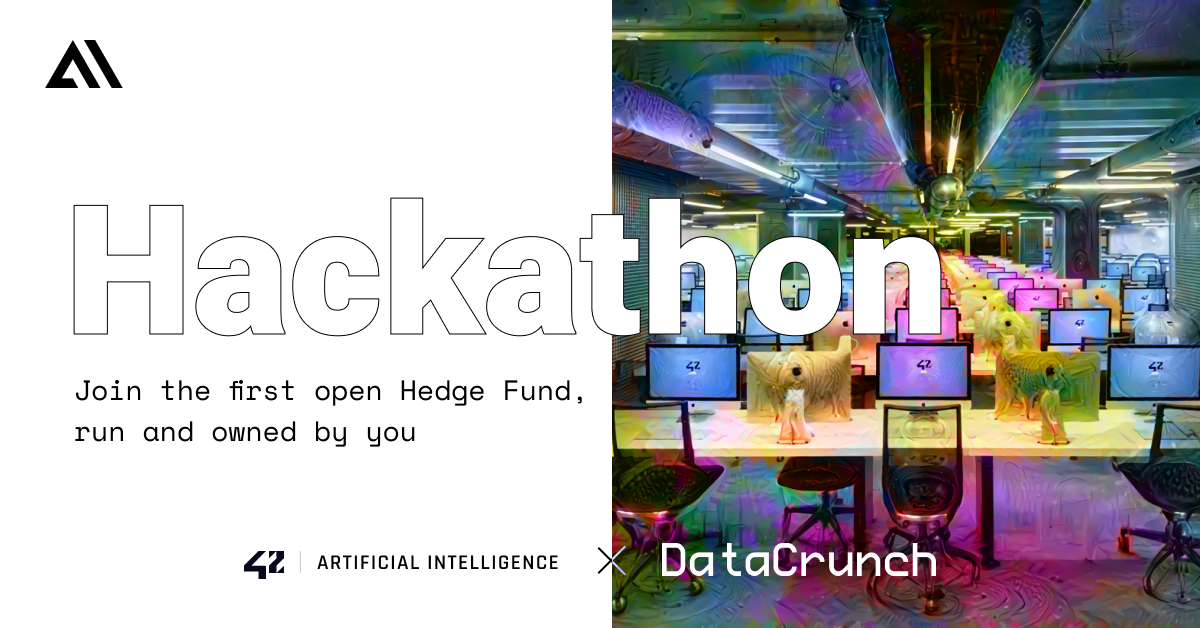

# QuickStart

##Basic step and workflow:

0 - Using this notebook

1 - Download data

2 - Explore data

3 - Choose and train a model

4 - Scoring

5 - Make prediction

6 - Submit

---

## 0 - Using this notebook 

To execute the cell press `shift+enter`. 

Follow the steps and login with your Google account.

In [1]:
# Lib & Dependencies
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import requests
from scipy import stats

# my work
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1 - Download data

We will provide you with two dataset

- Training_data will be use to train your model.
- Hackathon_data will be use to make your prediciton.


There is three target you need to provide prediction on: target_r, target_g, target_b.




In [2]:
# Data Download (may take a few minutes depending on your network)
train_datalink_X = 'https://tournament.datacrunch.com/data/X_train.csv'  
train_datalink_y = 'https://tournament.datacrunch.com/data/y_train.csv' 
hackathon_data_link = 'https://tournament.datacrunch.com/data/X_test.csv' 

# Data for training
train_data = pd.read_csv(train_datalink_X)
# Data for which you will submit your prediction
test_data = pd.read_csv(hackathon_data_link)
# Targets to be predicted
train_targets = pd.read_csv(train_datalink_y)

#If you don't want to work with time serie
train_data = train_data.drop(columns=['Moons', 'id'])
test_data = test_data.drop(columns=['Moons', 'id'])

In [3]:
display(train_data)
display(train_targets)
display(test_data)

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,...,Feature_87,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100,Feature_101,Feature_102,Feature_103,Feature_104,Feature_105,Feature_106,Feature_107,Feature_108,Feature_109,Feature_110,Feature_111,Feature_112,Feature_113,Feature_114,Feature_115,Feature_116,Feature_117,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126
0,1.00,0.5,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.75,0.0,1.0,0.25,...,0.25,0.00,0.00,0.25,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.75,0.50,0.75,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.25,0.00,1.0,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,0.25
1,1.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.0,0.75,0.0,1.0,0.25,...,0.75,0.50,0.25,0.50,0.75,0.25,0.25,0.25,0.50,0.75,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.25,0.00,1.0,0.00,0.75,0.00,0.50,0.00,0.25,0.25,0.00,0.25,0.0,0.25,0.0,0.25,0.0,0.25,0.75
2,0.75,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.0,0.75,0.0,1.0,0.25,...,0.25,0.00,0.00,0.50,0.00,0.00,1.00,1.00,0.00,1.00,0.25,0.50,0.00,0.50,0.50,0.50,0.25,0.50,0.25,0.25,0.25,0.75,0.00,1.0,0.00,1.00,0.00,1.00,0.00,0.75,0.00,1.00,0.00,1.0,0.00,1.0,0.50,1.0,0.75,1.00
3,1.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.25,0.50,0.50,0.50,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,0.50,0.0,0.75,0.0,1.0,0.25,...,0.50,0.50,0.50,0.50,0.25,0.50,0.75,0.50,0.25,0.50,0.00,0.25,0.75,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.00,1.0,0.00,0.50,0.25,0.25,0.50,0.00,0.50,0.00,0.25,0.0,0.50,0.0,0.50,0.0,0.25,0.25
4,0.75,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.25,0.00,0.25,0.5,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.50,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.50,0.75,0.25,0.50,0.0,0.75,0.0,1.0,0.25,...,0.00,0.50,0.75,0.25,0.00,0.00,0.75,0.00,0.00,1.00,0.50,1.00,0.25,0.75,0.50,0.00,0.25,0.75,1.00,0.75,0.75,0.75,0.25,1.0,0.00,1.00,0.00,0.75,0.50,0.75,1.00,0.75,0.75,0.5,0.25,0.5,0.50,0.5,0.75,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79722,1.00,1.0,1.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,...,0.00,0.75,0.00,0.50,0.00,0.00,0.00,0.50,0.75,1.00,0.75,1.00,0.75,0.75,0.50,0.25,1.00,0.75,0.75,1.00,1.00,1.00,0.00,1.0,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,0.00
79723,0.75,1.0,1.0,1.0,0.75,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.75,0.00,0.0,0.00,0.00,1.00,1.00,0.75,0.50,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,...,0.00,0.25,0.75,0.00,0.75,1.00,0.00,0.25,0.25,1.00,0.50,1.00,1.00,0.75,1.00,1.00,1.00,1.00,1.00,0.50,0.75,1.00,0.00,1.0,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,0.00
79724,1.00,1.0,1.0,1.0,1.00,1.0,1.00,1

,target_r,target_g,target_b
0,0.00,0.00,0.25
1,0.50,0.75,0.75
2,0.75,1.00,0.00
3,0.25,0.00,0.00
4,0.75,1.00,0.50
...,...,...,...
79722,1.00,0.50,0.50
79723,0.25,0.00,0.25
79724,0.50,0.00,0.25
79725,0.75,0.50,0.50


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,...,Feature_87,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100,Feature_101,Feature_102,Feature_103,Feature_104,Feature_105,Feature_106,Feature_107,Feature_108,Feature_109,Feature_110,Feature_111,Feature_112,Feature_113,Feature_114,Feature_115,Feature_116,Feature_117,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126
0,0.75,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.25,0.5,0.00,0.00,0.25,0.50,0.25,0.00,0.00,0.50,0.50,0.50,0.75,1.00,1.00,0.00,0.00,0.0,0.00,0.75,...,1.00,1.00,1.00,1.00,0.75,0.50,0.25,1.00,1.00,1.00,1.00,1.0,0.75,1.00,1.00,1.00,0.75,1.00,0.75,0.75,0.75,1.00,0.0,1.0,0.5,1.0,0.00,1.0,0.00,1.0,0.50,1.00,1.00,1.00,1.0,1.00,1.00,1.00,0.25,0.25
1,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.25,0.75,1.00,1.00,1.00,0.75,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.0,0.00,0.75,...,1.00,0.75,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.50,1.00,1.0,1.00,0.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.75,0.0,1.0,0.0,1.0,0.00,1.0,0.25,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,0.75,1.00
2,0.50,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.75,0.50,1.00,0.75,0.75,0.75,0.25,0.25,0.25,0.00,0.00,0.00,0.50,0.00,0.00,0.0,0.00,0.75,...,0.00,1.00,1.00,0.00,1.00,1.00,0.50,1.00,1.00,0.75,1.00,0.5,1.00,0.75,0.75,1.00,1.00,1.00,1.00,0.75,1.00,0.75,0.0,1.0,0.0,1.0,0.75,1.0,0.50,1.0,1.00,1.00,0.00,1.00,0.0,1.00,0.50,1.00,0.50,1.00
3,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.75,1.00,1.00,0.75,0.50,0.50,0.75,0.75,0.75,0.75,1.00,1.00,0.00,0.00,0.0,0.00,0.75,...,0.75,0.75,0.50,0.75,0.50,0.50,0.75,0.50,0.75,0.25,0.25,1.0,1.00,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.50,0.25,0.0,1.0,0.0,1.0,0.00,1.0,0.75,1.0,0.75,0.75,0.75,0.75,1.0,0.75,1.00,0.75,0.75,1.00
4,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.75,...,0.00,1.00,0.25,0.25,0.50,0.25,0.00,1.00,0.75,1.00,0.75,0.5,0.75,1.00,1.00,1.00,1.00,0.75,0.25,0.50,0.25,0.50,0.0,1.0,0.0,1.0,0.00,1.0,0.00,1.0,0.00,1.00,0.00,0.75,0.0,1.00,0.00,0.75,0.50,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95222,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.0,1.00,0.75,1.00,1.00,1.00,1.00,1.00,0.75,0.75,0.75,1.00,0.25,0.00,0.75,0.25,0.5,0.75,0.75,...,0.00,1.00,1.00,0.00,0.75,0.75,0.00,0.50,0.50,1.00,1.00,1.0,1.00,1.00,1.00,1.00,0.50,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,0.50,0.25
95223,1.00,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.75,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.75,0.25,0.5,0.75,0.75,...,0.00,1.00,1.00,0.00,0.75,0.75,0.00,0.50,0.75,1.00,1.00,1.0,1.00,1.00,1.00,0.75,0.75,1.00,1.00,1.00,1.00,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.00,1.0,1.00,1.00,1.00,1.00,0.5,1.00,0.25,1.00,0.75,0.50
95224,0.75,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.0

# 2 - Explore Data

Data processing is one of the most important part. Observe your data and prepare carefully what you will give to your model for training.

In [4]:
display(train_data.describe())
display(train_targets.describe())

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,...,Feature_87,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100,Feature_101,Feature_102,Feature_103,Feature_104,Feature_105,Feature_106,Feature_107,Feature_108,Feature_109,Feature_110,Feature_111,Feature_112,Feature_113,Feature_114,Feature_115,Feature_116,Feature_117,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126
count,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,...,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000,79727.000000
mean,0.499975,0.499966,0.499975,0.499934,0.499966,0.499981,0.499981,0.499975,0.499978,0.499981,0.499981,0.499981,0.499975,0.499981,0.499981,0.499981,0.499978,0.499975,0.499981,0.499981,0.499975,0.499978,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.476548,0.453068,0.387987,0.380081,0.394904,...,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.499981,0.301372,0.397554
std,0.353784,0.353772,0.353777,0.353792,0.353778,0.353777,0.353777,0.353777,0.353778,0.353777,0.353777,0.353777,0.353779,0.353777,0.353777,0.353777,0.353778,0.353779,0.353777,0.353777,0.353779,0.353781,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.394624,0.379108,0.378518,0.385074,0.388648,...,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.353777,0.258717,0.339850
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

,target_r,target_g,target_b
count,79727.000000,79727.000000,79727.000000
mean,0.499981,0.499981,0.499981
std,0.353777,0.353777,0.353777
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000
50%,0.500000,0.500000,0.500000
75%,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000


In [5]:
join = pd.merge(train_data,train_targets, left_index= True, right_index= True)

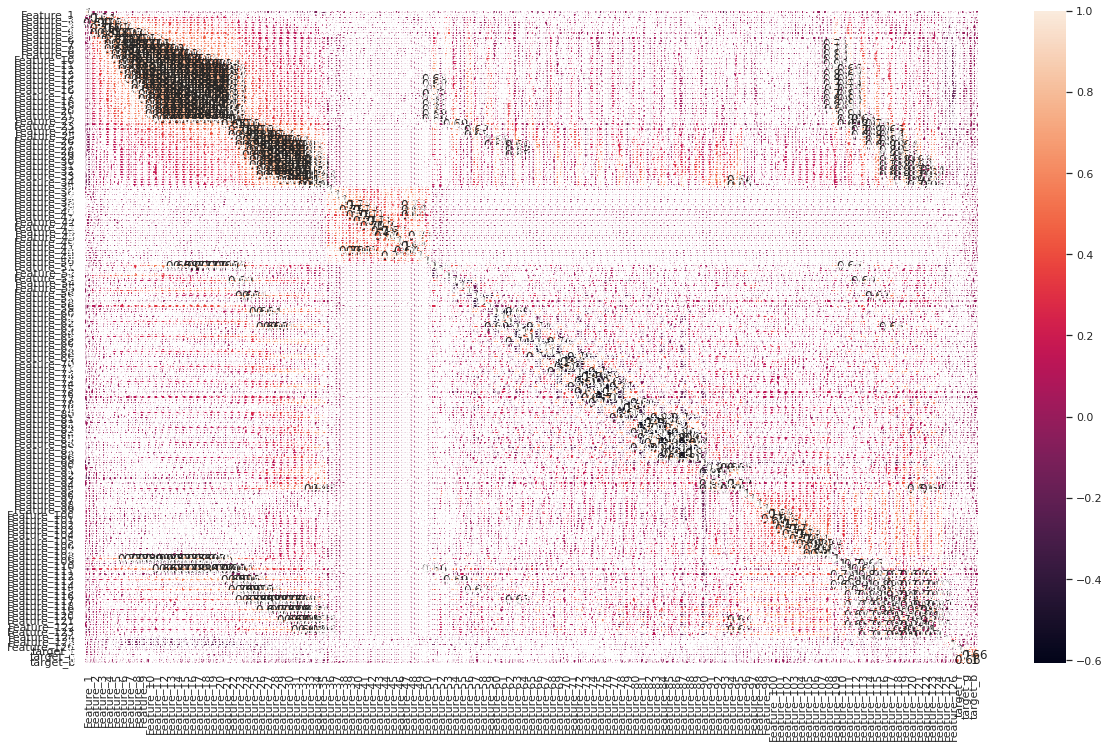

In [6]:
sns.set(rc = {'figure.figsize':(20,12)})
temp = join.corr()
sns.heatmap(temp, xticklabels=temp.columns, yticklabels=temp.columns, annot=True)

In [7]:
temp

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,...,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100,Feature_101,Feature_102,Feature_103,Feature_104,Feature_105,Feature_106,Feature_107,Feature_108,Feature_109,Feature_110,Feature_111,Feature_112,Feature_113,Feature_114,Feature_115,Feature_116,Feature_117,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126,target_r,target_g,target_b
Feature_1,1.000000,0.001040,-0.005944,-0.003301,-0.009245,-0.016047,-0.020250,-0.019335,-0.018471,-0.025110,-0.025592,-0.029338,-0.027133,-0.028517,-0.033140,-0.033797,-0.034305,-0.034543,-0.036409,-0.040800,-0.038514,-0.039215,-0.054204,-0.064376,-0.071472,-0.077504,-0.083736,-0.088051,-0.090206,-0.093338,-0.097540,-0.097008,-0.100359,-0.119218,-0.145612,-0.000015,2.629149e-05,0.000038,2.395317e-05,0.000026,...,-0.158872,0.012032,0.007053,-0.180531,0.012884,-0.017563,0.054291,0.033265,0.056008,0.059803,0.048216,0.043186,0.024296,0.013548,0.033885,0.046688,0.013780,-0.005574,-0.003113,-0.022993,0.106171,-0.036685,0.096764,-0.051579,0.079458,-0.060987,0.072862,-0.079903,0.066229,-0.097089,0.054003,-0.113713,0.044971,-0.140639,0.056020,-0.006315,0.000611,0.006877,0.002411,-0.006113
Feature_2,0.001040,1.000000,0.644015,0.522135,0.454382,0.400316,0.354547,0.318274,0.298399,0.278519,0.260943,0.249174,0.236908,0.226744,0.225598,0.220142,0.212850,0.206661,0.196159,0.188053,0.188697,0.178606,0.119573,0.103782,0.092758,0.085373,0.081759,0.068117,0.062605,0.060789,0.055001,0.055646,0.057275,0.051531,0.051030,-0.000062,-4.714100e-05,0.000024,-1.885437e-05,-0.000026,...,0.003169,-0.006301,0.025549,0.016718,0.000883,0.040714,0.026858,0.016073,0.018860,0.016141,0.014350,0.020870,0.020288,0.026245,0.015026,0.010510,0.005750,0.003602,0.006082,0.262766,0.018415,0.179441,0.024791,0.121076,0.025217,0.104847,0.025938,0.083820,0.028794,0.058972,0.031356,0.054563,0.029997,0.056617,0.031995,-0.057435,-0.045841,-0.006514,-0.003144,0.000294
Feature_3,-0.005944,0.644015,1.000000,0.757896,0.652227,0.578607,0.507836,0.457483,0.423258,0.394090,0.369919,0.349744,0.334941,0.322391,0.318194,0.311123,0.294129,0.287244,0.278552,0.269270,0.267621,0.260110,0.179826,0.148402,0.137648,0.119746,0.113176,0.101651,0.097818,0.096183,0.091404,0.095907,0.095500,0.085360,0.084902,-0.000021,-2.933184e-06,0.000008,9.357064e-07,0.000009,...,0.011581,0.008387,0.046889,0.024866,0.011638,0.073340,0.023657,0.021772,0.012878,0.014043,0.018496,0.017193,0.018784,0.019455,0.012746,0.009151,0.007341,0.006088,0.009189,0.372042,0.005700,0.260883,0.016392,0.182269,0.021785,0.149855,0.020782,0.114936,0.026200,0.096678,0.027178,0.086675,0.026301,0.087427,0.028994,-0.076899,-0.071607,-0.004685,-0.002812,-0.000595
Feature_4,-0.003301,0.522135,0.757896,1.000000,0.809753,0.703724,0.621606,0.565581,0.525839,0.493059,0.463509,0.434979,0.412754,0.397988,0.390616,0.377063,0.360063,0.351581,0.342796,0.331904,0.327424,0.317345,0.219942,0.181930,0.162420,0.137661,0.131034,0.113910,0.114261,0.108787,0.103100,0.104910,0.105261,0.086314,0.080627,-0.000146,-1.048690e-04,-0.000114,-6.175238e-06,-0.000062,...,0.001910,0.011412,0.059601,0.007403,0.012652,0.081980,0.013604,0.018007,0.000676,0.010040,0.016786,0.010215,0.012182,0.014042,0.012996,0.010710,0.009113,0.008956,0.011988,0.465037,-0.016992,0.317705,-0.003839,0.221958,0.008430,0.182894,0.007178,0.131385,0.015639,0.104754,0.017969,0.087761,0.019003,0.083984,0.020600,-0.090286,-0.081725,-0.007723,-0.004046,-0.000451
Feature_5,-0.009245,0.454382,0.652227,0.809753,1.000000,

# 3 - Choose models

Crunch with originality!!! 👨🏻‍🏭

In [8]:
from sklearn.preprocessing import MinMaxScaler
weight_r = temp['target_r']
weight_r
weight_r.drop(axis = 0, index = ['target_r','target_g','target_b'],inplace=True)
weight_r

Feature_1      0.006877
Feature_2     -0.006514
Feature_3     -0.004685
Feature_4     -0.007723
Feature_5     -0.009539
                 ...   
Feature_122    0.009521
Feature_123   -0.066300
Feature_124    0.007341
Feature_125   -0.004418
Feature_126   -0.004280
Name: target_r, Length: 126, dtype: float64

In [9]:
weight_g = temp['target_g']
weight_g
weight_g.drop(axis = 0, index = ['target_r','target_g','target_b'],inplace=True)
weight_g

Feature_1      0.002411
Feature_2     -0.003144
Feature_3     -0.002812
Feature_4     -0.004046
Feature_5     -0.006163
                 ...   
Feature_122    0.012483
Feature_123   -0.075119
Feature_124    0.009308
Feature_125   -0.002645
Feature_126   -0.004991
Name: target_g, Length: 126, dtype: float64

In [10]:
weight_b = temp['target_b']
weight_b
weight_b.drop(axis = 0, index = ['target_r','target_g','target_b'],inplace=True)
weight_b

Feature_1     -0.006113
Feature_2      0.000294
Feature_3     -0.000595
Feature_4     -0.000451
Feature_5     -0.001033
                 ...   
Feature_122    0.021803
Feature_123   -0.077123
Feature_124    0.019799
Feature_125   -0.003895
Feature_126   -0.004574
Name: target_b, Length: 126, dtype: float64

In [11]:
weights_combined = pd.merge(weight_r,weight_g, left_index=True, right_index=True)
weights_combined = weights_combined.merge(weight_b, left_index=True, right_index=True)
weights_combined

,target_r,target_g,target_b
Feature_1,0.006877,0.002411,-0.006113
Feature_2,-0.006514,-0.003144,0.000294
Feature_3,-0.004685,-0.002812,-0.000595
Feature_4,-0.007723,-0.004046,-0.000451
Feature_5,-0.009539,-0.006163,-0.001033
...,...,...,...
Feature_122,0.009521,0.012483,0.021803
Feature_123,-0.066300,-0.075119,-0.077123
Feature_124,0.007341,0.009308,0.019799
Feature_125,-0.004418,-0.002645,-0.003895


In [12]:
train_data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,...,Feature_87,Feature_88,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100,Feature_101,Feature_102,Feature_103,Feature_104,Feature_105,Feature_106,Feature_107,Feature_108,Feature_109,Feature_110,Feature_111,Feature_112,Feature_113,Feature_114,Feature_115,Feature_116,Feature_117,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126
0,1.00,0.5,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.75,0.0,1.0,0.25,...,0.25,0.00,0.00,0.25,0.00,0.00,1.00,1.00,0.00,1.00,1.00,0.75,0.50,0.75,0.50,0.50,0.25,0.25,0.25,0.25,0.25,0.25,0.00,1.0,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,0.25
1,1.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.0,0.75,0.0,1.0,0.25,...,0.75,0.50,0.25,0.50,0.75,0.25,0.25,0.25,0.50,0.75,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.25,0.00,1.0,0.00,0.75,0.00,0.50,0.00,0.25,0.25,0.00,0.25,0.0,0.25,0.0,0.25,0.0,0.25,0.75
2,0.75,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.0,0.75,0.0,1.0,0.25,...,0.25,0.00,0.00,0.50,0.00,0.00,1.00,1.00,0.00,1.00,0.25,0.50,0.00,0.50,0.50,0.50,0.25,0.50,0.25,0.25,0.25,0.75,0.00,1.0,0.00,1.00,0.00,1.00,0.00,0.75,0.00,1.00,0.00,1.0,0.00,1.0,0.50,1.0,0.75,1.00
3,1.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.25,0.50,0.50,0.50,0.50,0.25,0.50,0.50,0.25,0.50,0.25,0.75,0.50,0.0,0.75,0.0,1.0,0.25,...,0.50,0.50,0.50,0.50,0.25,0.50,0.75,0.50,0.25,0.50,0.00,0.25,0.75,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.25,0.00,1.0,0.00,0.50,0.25,0.25,0.50,0.00,0.50,0.00,0.25,0.0,0.50,0.0,0.50,0.0,0.25,0.25
4,0.75,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.25,0.00,0.25,0.5,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.50,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.50,0.75,0.25,0.50,0.0,0.75,0.0,1.0,0.25,...,0.00,0.50,0.75,0.25,0.00,0.00,0.75,0.00,0.00,1.00,0.50,1.00,0.25,0.75,0.50,0.00,0.25,0.75,1.00,0.75,0.75,0.75,0.25,1.0,0.00,1.00,0.00,0.75,0.50,0.75,1.00,0.75,0.75,0.5,0.25,0.5,0.50,0.5,0.75,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79722,1.00,1.0,1.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,...,0.00,0.75,0.00,0.50,0.00,0.00,0.00,0.50,0.75,1.00,0.75,1.00,0.75,0.75,0.50,0.25,1.00,0.75,0.75,1.00,1.00,1.00,0.00,1.0,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,0.00
79723,0.75,1.0,1.0,1.0,0.75,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.75,0.00,0.0,0.00,0.00,1.00,1.00,0.75,0.50,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,...,0.00,0.25,0.75,0.00,0.75,1.00,0.00,0.25,0.25,1.00,0.50,1.00,1.00,0.75,1.00,1.00,1.00,1.00,1.00,0.50,0.75,1.00,0.00,1.0,0.25,1.00,0.25,1.00,0.25,1.00,1.00,1.00,0.00,1.0,0.00,1.0,0.00,1.0,0.00,0.00
79724,1.00,1.0,1.0,1.0,1.00,1.0,1.00,1

In [13]:
join = join.apply(lambda x: (x*join.target_r)**2, axis=0).drop(axis=1, columns=['target_r'])

In [14]:
join

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,...,Feature_89,Feature_90,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100,Feature_101,Feature_102,Feature_103,Feature_104,Feature_105,Feature_106,Feature_107,Feature_108,Feature_109,Feature_110,Feature_111,Feature_112,Feature_113,Feature_114,Feature_115,Feature_116,Feature_117,Feature_118,Feature_119,Feature_120,Feature_121,Feature_122,Feature_123,Feature_124,Feature_125,Feature_126,target_g,target_b
0,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.250000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.015625,0.0,0.140625,0.0,0.2500,0.015625,...,0.015625,0.062500,0.140625,0.015625,0.015625,0.015625,0.062500,0.140625,0.062500,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.015625,0.015625,0.000000,0.2500,0.000000,0.140625,0.000000,0.062500,0.000000,0.015625,0.015625,0.000000,0.015625,0.000000,0.015625,0.000000,0.015625,0.000000,0.015625,0.140625,0.140625,0.140625
2,0.316406,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035156,0.0,0.316406,0.0,0.5625,0.035156,...,0.000000,0.140625,0.000000,0.000000,0.562500,0.562500,0.000000,0.562500,0.035156,0.140625,0.000000,0.140625,0.140625,0.140625,0.035156,0.140625,0.035156,0.035156,0.035156,0.316406,0.000000,0.5625,0.000000,0.562500,0.000000,0.562500,0.000000,0.316406,0.000000,0.562500,0.000000,0.562500,0.000000,0.562500,0.140625,0.562500,0.316406,0.562500,0.562500,0.000000
3,0.062500,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.003906,0.015625,0.015625,0.015625,0.015625,0.003906,0.015625,0.015625,0.003906,0.015625,0.003906,0.035156,0.015625,0.0,0.035156,0.0,0.0625,0.003906,...,0.015625,0.015625,0.003906,0.015625,0.035156,0.015625,0.003906,0.015625,0.000000,0.003906,0.035156,0.035156,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003906,0.003906,0.000000,0.0625,0.000000,0.015625,0.003906,0.003906,0.015625,0.000000,0.015625,0.000000,0.003906,0.000000,0.015625,0.000000,0.015625,0.000000,0.003906,0.003906,0.000000,0.000000
4,0.316406,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.0000,0.035156,0.0000,0.035156,0.140625,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,0.000000,0.140625,0.562500,0.562500,0.562500,0.316406,0.316406,0.316406,0.316406,0.140625,0.316406,0.035156,0.140625,0.0,0.316406,0.0,0.5625,0.035156,...,0.316406,0.035156,0.000000,0.000000,0.316406,0.000000,0.000

In [15]:
# def xg_boost_hackathon(data, target):
#     X, y = data, target
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
#     model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, learning_rate=0.01, n_estimators=2000, n_jobs=-1, colsample_bytree=0.5)
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     scorer(y_test, pred)

#     return model

In [16]:
X, y = train_data, train_targets
scaler = MinMaxScaler(feature_range=(1,2))
linreg = LinearRegression()
LR_model = linreg.fit(train_data,train_targets.target_r)
slope = LR_model.coef_
print(slope)

X = X.apply(lambda x: x+1).multiply(slope, axis = 1)
X = X.to_numpy()
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X[1,:]

[-5.20242808e-03 -7.99484330e-03  1.08641039e-02 -2.30038657e-03
 -3.45392387e-03 -5.47639540e-03  6.72524369e-03 -9.27985854e-03
  5.51350704e-03 -2.82311534e-03  5.99960722e-03 -4.14771381e-04
  2.12958930e-03  5.39279058e-05 -1.19945424e-03 -5.28700008e-04
  1.33475507e-02 -4.53764796e-03 -1.06366975e-02  1.10246021e-02
 -9.75984346e-03  4.70755419e-03  6.20116656e-02  3.76639622e-02
  6.59227689e-03 -1.74232678e-02  7.18678874e-02  7.09727085e-03
 -7.55933992e-03 -2.28423749e-03 -9.18928745e-03 -5.29875969e-03
 -4.91701848e-02 -2.25981319e-02 -4.30658192e-02  1.17136152e-04
  2.10422527e-04 -1.95982375e-04 -2.53076107e-04 -3.38339276e-05
  1.97009038e-04 -7.72511480e-05 -5.02006099e-04  2.58644159e-04
  2.37410594e-04 -1.30616588e-05  2.12911461e-04  2.92358822e-04
 -3.78564085e-04 -2.15224572e-04 -1.05489962e-02  2.58627084e-03
  5.23679518e-04 -1.51386129e-02 -3.16220058e-03 -4.61525652e-03
 -1.74543058e-02  8.63547064e-03 -1.43229845e-02  2.16613212e-02
  3.32165669e-03  1.17577

array([0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  ,
       0.  , 0.  , 0.25, 0.75, 0.25, 0.25, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.  , 0.75, 1.  , 0.  , 0.75, 0.75, 0.75, 0.75, 0.  ,
       1.  , 1.  , 0.  , 0.5 , 0.5 , 0.  , 0.75, 0.75, 0.  , 0.75, 0.75,
       1.  , 0.5 , 0.5 , 1.  , 0.75, 0.25, 0.  , 0.5 , 0.25, 0.25, 0.75,
       0.75, 0.25, 0.75, 0.25, 1.  , 0.5 , 0.25, 1.  , 0.5 , 0.5 , 0.5 ,
       0.5 , 0.5 , 0.5 , 0.5 , 0.5 , 0.25, 0.25, 0.75, 0.25, 0.75, 0.5 ,
       0.25, 0.5 , 0.25, 0.25, 0.75, 0.25, 0.5 , 0.75, 0.5 , 0.75, 0.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.75, 0.75, 0.25, 1.  , 1.  ,
       0.  , 0.25, 1.  , 0.5 , 1.  , 0.75, 0.75, 0.  , 0.75, 0.  , 0.75,
       1.  , 0.25, 1.  , 0.75, 0.25])

In [17]:
def xg_boost_hackathon_mymodel(data, target):
    X, y = train_data, train_targets
    scaler = MinMaxScaler(feature_range=(1,2))
    linreg = LinearRegression()
    LR_model = linreg.fit(train_data,train_targets.target_r)
    slope = LR_model.coef_
    print(slope)

    X = X.apply(lambda x: x+1).multiply(slope, axis = 1)
    X = X.to_numpy()
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    X[1,:]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    dtrain , dtest = xgb.DMatrix(data = X_train, label = y_train) , xgb.DMatrix(data = X_test, label = y_test)

    evalsets = [(dtrain, 'train'), (dtest, 'test')]

    params = {'max_depth':5, 'eta': 0.01, 'objective':'reg:squarederror','silent':False,'subsample':0.7, 'colsample_bytree':0.7}
 
    model = xgb.train(params = params, dtrain = dtrain, num_boost_round=1000, evals=evalsets, verbose_eval=10, early_stopping_rounds = 100)

    # bst_model = model.best_iteration
    pred = model.predict(dtest)
    scorer(y_test, pred)

    return model

In [18]:
def xg_boost_hackathon_gridsearchcv_g(data, target):
    X, y = data, target

    scaler = MinMaxScaler(feature_range=(1,2))
    linreg = LinearRegression()
    LR_model = linreg.fit(train_data,train_targets.target_g)
    slope = LR_model.coef_
    print(slope)

    X = X.apply(lambda x: x+1).multiply(slope, axis = 1)
    X = X.to_numpy()
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    X[1,:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
    
    dtrain , dtest = xgb.DMatrix(data = X_train, label = y_train) , xgb.DMatrix(data = X_test, label = y_test)

    evalsets = [(dtrain, 'train'), (dtest, 'test')]

    model = xgb.XGBRegressor()
    
    #Gridsearch parameters
    params = {'objective':['reg:linear','reg:squarederror'],
              'learning_rate': [0.01,.03, 0.05], #so called `eta` value
              'max_depth': [3,4,5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [0.7, 0.8],
              'n_estimators': [500]}
   
    print("-------------------------")
        
    #define grid search function
    grid = GridSearchCV(model,
                        params,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
    
    #Call gridsearch Model to fit on the training dataset
    grid.fit(X_train,y_train)
    
    # Predict the model
    pred = grid.predict(X_test)
    scorer(y_test, pred)
    
    print("-------------------------")
    print(grid.best_score_)
    print(grid.best_params_)
    print("-------------------------")

    return grid

# 4 - How we will compute your mean score

In [19]:
def scorer(y_test, y_pred):
    score = (stats.spearmanr(y_test, y_pred)*100)[0]
    print('Score as calculated for the leader board (っಠ‿ಠ)っ {}'.format(score))

# Train your Models on targets

You can submit continious target if you want

In [ ]:
# Making prediction for target g
model_target_g = xg_boost_hackathon_gridsearchcv_g(train_data, train_targets.target_g)
best_g = model_target_g.best_params_

[-1.11247119e-02 -4.36969189e-03  8.52996182e-03 -3.88541575e-04
 -2.21129877e-03 -9.21398460e-03  3.27598393e-03  8.03489510e-04
 -1.78965565e-03  4.69311645e-03 -3.57064171e-02  1.54019410e-02
 -3.23584175e-03 -1.45030805e-03 -1.22380245e-03 -3.87610443e-03
  3.03244288e-03  3.16529955e-03  4.46543061e-04  1.79515209e-03
 -1.79010863e-02  8.96546576e-02  8.75516033e-02  1.91880732e-02
 -3.97532011e-03 -1.26397085e-02  5.26677232e-02  8.97940289e-03
 -7.53391147e-03  5.68720874e-03  6.71547631e-03  5.66547722e-03
 -1.22947464e-02 -9.11311178e-02 -5.81913690e-02  7.92780776e-05
  1.98017093e-04 -5.68569938e-05 -1.88437345e-04 -8.34458682e-05
  1.60094942e-04 -6.58094764e-05 -4.59099237e-04  2.84920129e-04
  2.48818928e-04 -4.40981946e-05  1.83303417e-04  2.21234125e-04
 -4.44722207e-04 -2.48125901e-04 -6.05356931e-03  2.53174565e-03
  7.87806002e-06 -1.31499892e-02 -6.27095010e-03 -7.44143114e-04
 -1.45059624e-02  4.89851246e-03 -9.95084115e-03  2.41573867e-02
  5.34602391e-03  4.96525

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 46.0min


In [ ]:
def my_XGBOOST_g(data,target):
    model = xgb.XGBRegressor(objective='reg:linear', max_depth=3, learning_rate=0.01, n_estimators=500, n_jobs=-1, subsample = 0.7, colsample_bytree=0.7)
    model.fit(data, target)
    # pred = model.predict(target)
    # scorer(target, pred)
    return model

In [ ]:
model_g = my_XGBOOST_g(train_data, train_targets.target_g)

In [ ]:
prediction = pd.DataFrame()
prediction['target_g'] = model_g.predict(test_data)

In [ ]:
def xg_boost_hackathon_gridsearchcv_b(data, target,g_train):
    print(data.shape)
    data = data.merge(g_train, left_index = True, right_index = True)
    print(data.shape)
    X, y = data, target
    scaler = MinMaxScaler(feature_range=(1,2))
    linreg = LinearRegression()
    LR_model = linreg.fit(data,train_targets.target_b)
    slope = LR_model.coef_
    print(slope)

    X = X.apply(lambda x: x+1).multiply(slope, axis = 1)
    X = X.to_numpy()
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    X[1,:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
    
    dtrain , dtest = xgb.DMatrix(data = X_train, label = y_train) , xgb.DMatrix(data = X_test, label = y_test)

    evalsets = [(dtrain, 'train'), (dtest, 'test')]

    model = xgb.XGBRegressor()
    
    #Gridsearch parameters
    params = {'objective':['reg:linear'],
              'learning_rate': [0.01,.03, 0.05], #so called `eta` value
              'max_depth': [3,4,5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [0.7, 0.8],
              'n_estimators': [500]}
   
    print("-------------------------")
        
    #define grid search function
    grid = GridSearchCV(model,
                        params,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
    
    #Call gridsearch Model to fit on the training dataset
    grid.fit(X_train,y_train)
    
    # Predict the model
    pred = grid.predict(X_test)
    scorer(y_test, pred)
    
    print("-------------------------")
    print(grid.best_score_)
    print(grid.best_params_)
    print("-------------------------")

    return grid

In [ ]:
# Making prediction for target b
model_target_b = xg_boost_hackathon_gridsearchcv_b(train_data, train_targets.target_b, train_targets.target_g)
best_b = model_target_b.best_params_

In [ ]:
def my_XGBOOST_b(data, target, g_train):
    data = data.merge(g_train, left_index=True, right_index=True, how = 'left')
    model = xgb.XGBRegressor(objective='reg:linear', max_depth=3, learning_rate=0.01, n_estimators=500, n_jobs=-1, subsample = 0.8, colsample_bytree=0.8)
    model.fit(data, target)
    # pred = model.predict(target)
    # scorer(target, pred)
    return model

In [ ]:
model_b = my_XGBOOST_b(train_data, train_targets.target_b, prediction.target_g)

In [ ]:
test_data_b = test_data.merge(prediction, left_index=True, right_index=True, how = 'left')

In [ ]:
prediction['target_b'] = model_b.predict(test_data_b)

In [ ]:
def xg_boost_hackathon_gridsearchcv_r(data, target, g_train, b_train):
    print(data.shape)
    data = data.merge(g_train, left_index = True, right_index = True)
    data = data.merge(b_train, left_index = True, right_index = True)
    print(data.shape)
    X, y = data, target
    scaler = MinMaxScaler(feature_range=(1,2))
    linreg = LinearRegression()
    LR_model = linreg.fit(data,train_targets.target_r)
    slope = LR_model.coef_
    print(slope)

    X = X.apply(lambda x: x+1).multiply(slope, axis = 1)
    X = X.to_numpy()
    scaler = MinMaxScaler(feature_range=(0,1))
    X = scaler.fit_transform(X)
    X[1,:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
    
    dtrain , dtest = xgb.DMatrix(data = X_train, label = y_train) , xgb.DMatrix(data = X_test, label = y_test)

    evalsets = [(dtrain, 'train'), (dtest, 'test')]

    model = xgb.XGBRegressor()
    
    #Gridsearch parameters
    params = {'objective':['reg:linear'],
              'learning_rate': [0.01,.03, 0.05], #so called `eta` value
              'max_depth': [3,4,5],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [0.7, 0.8],
              'n_estimators': [500]}
   
    print("-------------------------")
        
    #define grid search function
    grid = GridSearchCV(model,
                        params,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)
    
    #Call gridsearch Model to fit on the training dataset
    grid.fit(X_train,y_train)
    
    # Predict the model
    pred = grid.predict(X_test)
    scorer(y_test, pred)
    
    print("-------------------------")
    print(grid.best_score_)
    print(grid.best_params_)
    print("-------------------------")

    return grid

In [ ]:
# Making prediction for target r
model_target_r = xg_boost_hackathon_gridsearchcv_r(train_data, train_targets.target_r,train_targets.target_g,train_targets.target_b)
best_r = model_target_r.best_params_

In [ ]:
def my_XGBOOST_r(data,target,g_train, b_train):
    data = data.merge(g_train, left_index=True, right_index=True, how = 'left')
    data = data.merge(b_train, left_index=True, right_index=True, how = 'left')
    model = xgb.XGBRegressor(objective='reg:linear', max_depth=3, learning_rate=0.01, n_estimators=500, n_jobs=-1, subsample = 0.8, colsample_bytree=0.7)
    model.fit(data, target)
    # pred = model.predict(target)
    # scorer(target, pred)
    return model

In [ ]:
model_r = my_XGBOOST_r(train_data, train_targets.target_r, prediction.target_g, prediction.target_b)

In [ ]:
test_data_r = test_data.merge(prediction, left_index=True, right_index=True, how = 'left')

In [ ]:
prediction['target_r'] = model_r.predict(test_data_r)

# 5 - Make prediction on the 3 targets

When you feel like your model is accurate enough it's time to predict the target and submit your results.

Repeat the operation on the three targets, concatenate the answers and submit.

**WARNING** 1/ Keep the raw order identical.

**WARNING** 2/ Be sure that your columns are named target_r, target-g and
 target_b.

**WARNING** 3/ Your prediction need to be between 0 and 1.

**WARNING** 4/ Don't submit constant values.

In [ ]:
prediction

# 6 - Submit predictions

Past <u>your</u> API key here. You received it by email upon subscription and can find it on your leaderboard.


In [ ]:
API_KEY = "zbK3pVOcShazCLMew4ScnOI1zCe2CZT7iUrfSRJP6O7jKv87lgNCn7qCqOH5" # <- HERE

r = requests.post("https://tournament.datacrunch.com/api/submission",
    files = {
        "file": ("x", prediction.to_csv().encode('ascii'))
    },
    data = {
        "apiKey": API_KEY
    },
)

if r.status_code == 200:
    print("Submission submitted :)")
elif r.status_code == 423:
    print("ERR: Submissions are close")
    print("You can only submit during rounds eg: Friday 7pm GMT+1 to Sunday midnight GMT+1.")
    print("Or the server is currently crunching the submitted files, please wait some time before retrying.")
elif r.status_code == 422:
    print("ERR: API Key is missing or empty")
    print("Did you forget to fill the API_KEY variable?")
elif r.status_code == 404:
    print("ERR: Unknown API Key")
    print("You should check that the provided API key is valid and is the same as the one you've received by email.")
elif r.status_code == 400:
    print("ERR: The file must not be empty")
    print("You have send a empty file.")
elif r.status_code == 401:
    print("ERR: Your email hasn't been verified")
    print("Please verify your email or contact a cruncher.")
elif r.status_code == 409:
    print("ERR: Duplicate submission")
    print("Your work has already been submitted with the same exact results, if you think that this a false positive, contact a cruncher.")
    print("MD5 collision probability: 1/2^128 (source: https://stackoverflow.com/a/288519/7292958)")
elif r.status_code == 429:
    print("ERR: Too many submissions")
else:
    print("ERR: Server returned: " + str(r.status_code))
    print("Ouch! It seems that we were not expecting this kind of result from the server, if the probleme persist, contact a cruncher.")

In [ ]:
# Downloads data
from google.colab import files
with open("prediciton.csv", "wb") as f:
    f.write(prediction.to_csv().encode('ascii'))
files.download('prediciton.csv')

In [ ]:
from google.colab import files
import pickle

# Export model as pickle
pickle.dump(model_target_r, open("model_target_r.model", "wb"))
files.download('model_target_r.model')

In [ ]:
!pip freeze | grep "sklearn" 